In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from datetime import datetime

In [2]:
dataset = pd.read_csv('steam_reviews.csv')

In [4]:
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit = 's')


In [5]:
dataset = pd.read_csv('steam_reviews.csv', header='infer',
parse_dates=['timestamp_created',
'timestamp_updated', 'author.last_played'],
date_parser=parsedate)

In [6]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [7]:
dataset.shape

(21747371, 23)

# RQ1

In [44]:
dataset.describe()

,Unnamed: 0,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07
mean,1.087369e+07,3.928181e+05,5.187500e+07,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03
std,6.277927e+06,2.480977e+05,2.084267e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179438e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04
min,0.000000e+00,7.000000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.436844e+06,2.427600e+05,3.639355e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02
50%,1.087369e+07,3.595500e+05,5.384058e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03
75%,1.631053e+07,5.780800e+05,6.928793e+07,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03
max,2.174738e+07,1.291340e+06,8.521867e+07,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06


le percentuali che si vedono sono dopo aver selezionato i primi 30 giochi, quindi sono il numero di recensioni rispetto a quelle totali ricevute dai primi trenta

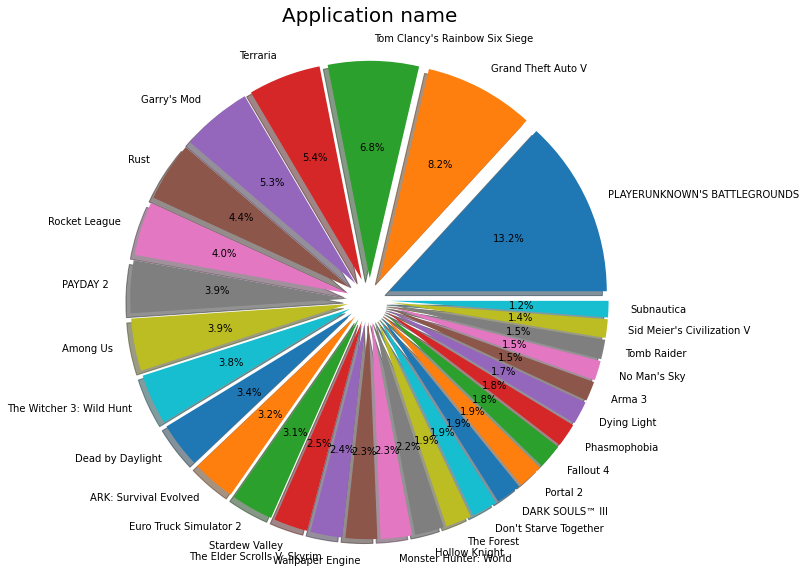

In [13]:
a = pd.Series(dataset.groupby("app_name").app_id.count().sort_values(ascending=False).head(30))
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(a,
labels = a.index,
explode = [0.1 for value in range(0, a.index.nunique())],
shadow = True, autopct = '%.1f%%')
plt.title('Application name', fontsize = 20)
plt.axis('off')
plt.show()

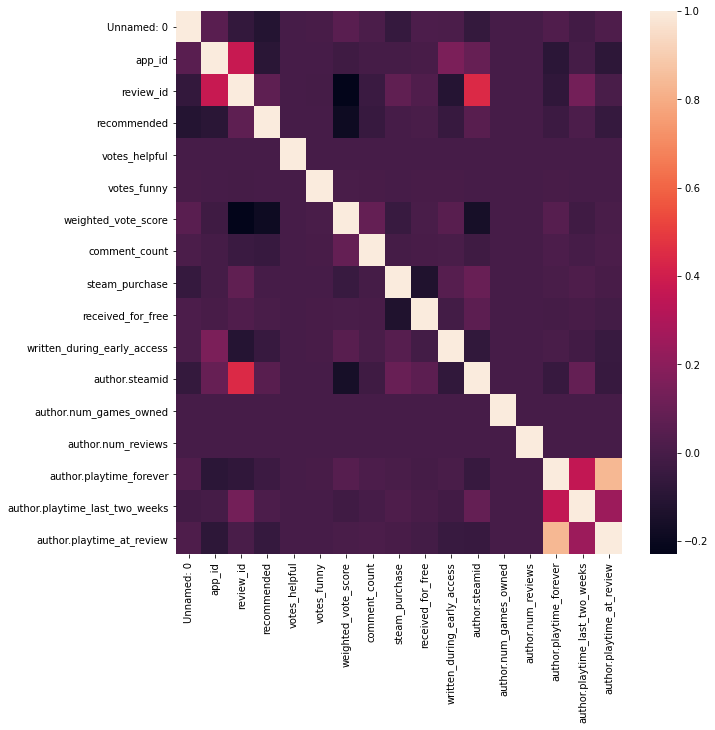

In [19]:
sns.heatmap(dataset.corr())

abbiamo plottato la correlation matrix di tutto il dataset e abbiamo notato che non c'è nessuna correlazione particolare fra le varie colonne tranne che quelle relative al tempo giocato dell'autore perciò procediamo con il plottare la matrix correlation di quelle variabili per avere info più precise sui valori 

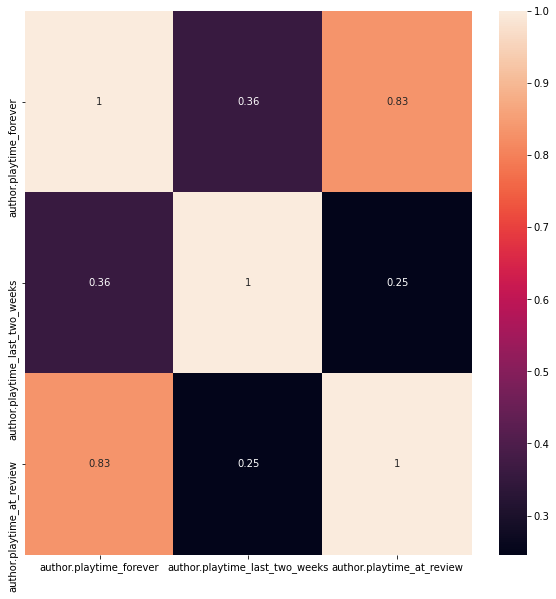

In [18]:
df = pd.DataFrame(dataset,columns=['author.playtime_forever','author.playtime_last_two_weeks','author.playtime_at_review'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [25]:
def funzz(lista):    
    dataset_4 = dataset["language", 'timestamp_created']
    lista = [datetime.strptime(t, '%H:%M:%S') for t in lista]
    sec_1 = []
    min_1 = []
    ora_1 = []
    number_review = []
    for i in range(len(lista)):
        sec_1.append(lista[i].time().second)
        min_1.append(lista[i].time().minute)
        ora_1.append(lista[i].time().hour)
    for i in range(0, len(lista), 2):
        number_review.append(dataset[(dataset.timestamp_created.dt.hour >= ora_1[i]) & (dataset.timestamp_created.dt.minute >= min_1[i]) & (dataset.timestamp_created.dt.second >= sec_1[i]) & (dataset.timestamp_created.dt.hour <= ora_1[i+1]) & (dataset.timestamp_created.dt.minute <= min_1[i+1]) & (dataset.timestamp_created.dt.second <= sec_1[i+1])].review_id.count())
    xx = ['8am', '2pm', '10pm']
    plt.bar(xx, number_review, color = 'green')
    plt.yscale('log')
    #plt.yticks([2000000, 2500000, 3000000, 3500000, 4000000])
    plt.title('Number of review for each interval of time')
    plt.xlabel('Intervals')
    plt.ylabel('Number of review')
    plt.show()

In [37]:
dataset_4 = dataset[["language", "timestamp_created"]]

In [38]:
dataset_4

,language,timestamp_created
0,schinese,2021-01-23 06:00:29
1,schinese,2021-01-23 05:50:30
2,schinese,2021-01-23 05:46:40
3,english,2021-01-23 05:32:50
4,schinese,2021-01-23 05:23:47
...,...,...
21747366,english,2020-03-23 18:05:04
21747367,english,2020-03-23 18:04:53
21747368,english,2020-03-23 18:04:33
21747369,english,2020-03-23 18:03:51


In [41]:
a = dataset_4[(dataset_4.timestamp_created.dt.hour >= 8) & (dataset_4.timestamp_created.dt.minute >= 0) & (dataset_4.timestamp_created.dt.second >= 0) & (dataset_4.timestamp_created.dt.hour <= 14) & (dataset_4.timestamp_created.dt.minute <= 0) & (dataset_4.timestamp_created.dt.second <= 0)]
a.groupby("language").language.count().sort_values(ascending=False).head(5)


language
english     600
schinese    460
russian     233
german       74
koreana      65
Name: language, dtype: int64

In [43]:
b = dataset[(dataset.timestamp_created.dt.hour >= 14) & (dataset.timestamp_created.dt.minute >= 0) & (dataset.timestamp_created.dt.second >= 0) & (dataset.timestamp_created.dt.hour <= 22) & (dataset.timestamp_created.dt.minute <= 0) & (dataset.timestamp_created.dt.second <= 0)]
#b.groupby("language").language.count().sort_values(ascending=False).head(5)
b

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played


In [40]:
#dataset[(dataset.timestamp_created.dt.time>='8:00:00') & (dataset.timestamp_created.dt.time<='14:00:00')]

In [55]:
arr_1 = np.array((dataset['timestamp_created'].dt.time.astype('str') >= "08:00:00")& (dataset['timestamp_created'].dt.time.astype('str') <= "14:00:00"))
arr_2 = np.array((dataset['timestamp_created'].dt.time.astype('str') >= "14:00:01")& (dataset['timestamp_created'].dt.time.astype('str') <= "22:00:00"))
arr_3 = np.array((dataset['timestamp_created'].dt.time.astype('str') >= "22:00:01")& (dataset['timestamp_created'].dt.time.astype('str') <= "7:59:59"))




In [63]:
a = pd.Series(dataset[arr_1].groupby("language").language.count().sort_values(ascending=False).head(10))


In [80]:
a

language
english      1723702
schinese     1426743
russian       777686
koreana       238318
german        202335
turkish       188741
polish        148360
french        143969
spanish       107999
brazilian      91852
Name: language, dtype: int64

In [66]:
b = pd.Series(dataset[arr_2].groupby("language").language.count().sort_values(ascending=False).head(10))

In [77]:
b

language
english      3818059
russian      1099360
schinese      916086
german        418563
brazilian     370425
spanish       345741
turkish       327838
french        281883
polish        270653
koreana       157203
Name: language, dtype: int64

In [59]:
c = pd.Series(dataset[arr_3].groupby("language").language.count().sort_values(ascending=False).head(10))

In [81]:
c

language
english      985736
brazilian    111522
russian       99048
spanish       98581
schinese      66039
german        59597
french        48916
turkish       44808
polish        35184
koreana       17926
Name: language, dtype: int64

In [75]:
df = a.to_frame()


In [78]:
df["language_fascia_2"]=b

In [79]:
df

,language,language_fascia_2
language,,
english,1723702,3818059
schinese,1426743,916086
russian,777686,1099360
koreana,238318,157203
german,202335,418563
turkish,188741,327838
polish,148360,270653
french,143969,281883
spanish,107999,345741


In [82]:

df["language_fascia_3"]=c

In [90]:
df['index'] = df.index

In [91]:
df

,language,language_fascia_2,language_fascia_3,index
language,,,,
english,1723702,3818059,985736,english
schinese,1426743,916086,66039,schinese
russian,777686,1099360,99048,russian
koreana,238318,157203,17926,koreana
german,202335,418563,59597,german
turkish,188741,327838,44808,turkish
polish,148360,270653,35184,polish
french,143969,281883,48916,french
spanish,107999,345741,98581,spanish


Text(0, 0.5, 'number reviews')

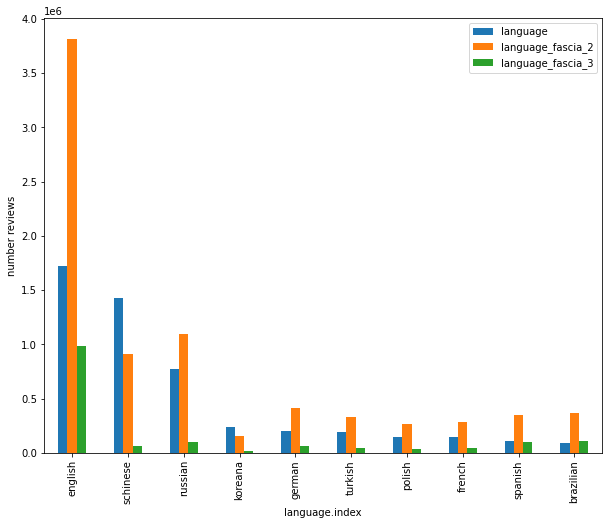

In [93]:
ax = df.plot(x = "index", kind ='bar', stacked = False, figsize =(10,8))
ax.set_xlabel('language.index')
ax.set_ylabel("number reviews")

# RQ2

### number of reviews for each application in descending order.

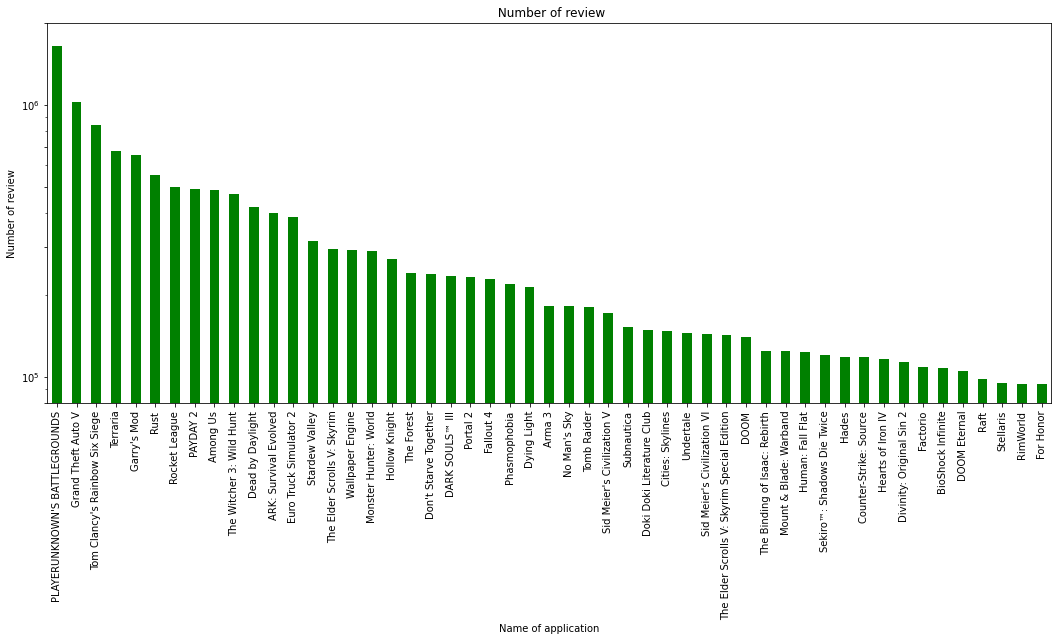

In [8]:
number_review = dataset.groupby("app_name").review_id.count().sort_values(ascending=False)
number_review[0:51].plot.bar(figsize = (18, 7), title=' Number of review', xlabel='Name of application',
ylabel='Number of review', color = "green", logy = True)
#plt.yticks([80000, 100000, 300000, 500000, 700000,1000000, 2000000])
#plt.show()


### Best Weighted Vote Score

In [9]:
massimi = pd.Series(dataset.groupby("app_name").weighted_vote_score.mean().sort_values(ascending=False).head(50))
#medie = dataset.groupby("app_name").weighted_vote_score.mean().sort_values(ascending=False).head(10)
massimi



app_name
Hunt Down The Freeman                   0.502150
Urban Empire                            0.438623
METAL GEAR SURVIVE                      0.421632
Identity                                0.415384
Umbrella Corps                          0.414678
Torment: Tides of Numenera              0.411199
BERSERK and the Band of the Hawk        0.397092
DRAGON QUEST HEROES™ II                 0.381110
X Rebirth                               0.380447
Toukiden 2                              0.380300
Warhammer 40,000: Dawn of War III       0.377935
DYNASTY WARRIORS 9                      0.371213
RollerCoaster Tycoon World              0.365161
Wolfenstein: Youngblood                 0.354932
Steel Division: Normandy 44             0.351986
SENRAN KAGURA Peach Beach Splash        0.347711
Clicker Heroes 2                        0.345768
Takedown: Red Sabre                     0.337137
Secret of Mana                          0.336822
Bless Online                            0.331621
Artifact   

### Which applications have the most and the least recommendations

In [76]:
#Most
new_data = dataset[(dataset.recommended == True)]
appp = pd.Series(new_data.groupby("app_name").recommended.count().sort_values(ascending=False).head(10))
appp

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Rust                              468892
Among Us                          463287
The Witcher 3: Wild Hunt          460252
Rocket League                     449464
PAYDAY 2                          428136
Name: recommended, dtype: int64

In [85]:
#Least
new_data1 = dataset[(dataset.recommended == False)]
apppp = pd.Series(new_data1.groupby("app_name").recommended.count().sort_values(ascending=False).head(10))
apppp

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     757838
Grand Theft Auto V                187805
Tom Clancy's Rainbow Six Siege     99521
ARK: Survival Evolved              84766
Rust                               80182
Dead by Daylight                   73315
PAYDAY 2                           59611
No Man's Sky                       56537
Fallout 4                          49745
Rocket League                      49101
Name: recommended, dtype: int64

### How many of these applications were purchased, and how many were given for free?

Fra quelli che hanno ricevuto raccomandazioni positive quanti sono stati ceduti gratuitamente e quanti no

In [83]:
#Most
q = list(appp.index)
new_data = new_data[(new_data["app_name"].isin(q))]
new_data.groupby(["app_name", "received_for_free"]).recommended.count()

app_name                        received_for_free
Among Us                        False                442858
                                True                  20429
Garry's Mod                     False                608583
                                True                  23975
Grand Theft Auto V              False                796151
                                True                  35160
PAYDAY 2                        False                392454
                                True                  35682
PLAYERUNKNOWN'S BATTLEGROUNDS   False                842990
                                True                  43427
Rocket League                   False                432489
                                True                  16975
Rust                            False                450871
                                True                  18021
Terraria                        False                639147
                                True              

In [87]:
#Least
q = list(apppp.index)
new_data1 = new_data1[(new_data1["app_name"].isin(q))]
new_data1.groupby(["app_name", "received_for_free"]).recommended.count()

app_name                        received_for_free
ARK: Survival Evolved           False                 82992
                                True                   1774
Dead by Daylight                False                 70210
                                True                   3105
Fallout 4                       False                 49023
                                True                    722
Grand Theft Auto V              False                184341
                                True                   3464
No Man's Sky                    False                 55951
                                True                    586
PAYDAY 2                        False                 56880
                                True                   2731
PLAYERUNKNOWN'S BATTLEGROUNDS   False                739822
                                True                  18016
Rocket League                   False                 47824
                                True              

# RQ 3

In [100]:
def funzione(lista):
    lista = [datetime.strptime(t, '%H:%M:%S') for t in lista]
    sec_1 = []
    min_1 = []
    ora_1 = []
    number_review = []
    for i in range(len(lista)):
        sec_1.append(lista[i].time().second)
        min_1.append(lista[i].time().minute)
        ora_1.append(lista[i].time().hour)
    for i in range(0, len(lista), 2):
        number_review.append(dataset[(dataset.timestamp_created.dt.hour >= ora_1[i]) & (dataset.timestamp_created.dt.minute >= min_1[i]) & (dataset.timestamp_created.dt.second >= sec_1[i]) & (dataset.timestamp_created.dt.hour <= ora_1[i+1]) & (dataset.timestamp_created.dt.minute <= min_1[i+1]) & (dataset.timestamp_created.dt.second <= sec_1[i+1])].review_id.count())
    xx = ['6am', '11am', '2pm', '5pm', '8pm', '12am', '3am']
    plt.bar(xx, number_review, color = 'green')
    plt.yscale('log')
    plt.yticks([2000000, 2500000, 3000000, 3500000, 4000000])
    plt.title('Number of review for each interval of time')
    plt.xlabel('Intervals')
    plt.ylabel('Number of review')
    plt.show()
    
    
    
    

In [101]:
intervalli = ['06:00:00', '10:59:59', '11:00:00', '13:59:59', '14:00:00', '16:59:59',
        '17:00:00', '19:59:59', '20:00:00', '23:59:59', '00:00:00', '02:59:59', '03:00:00',
        '05:59:59']

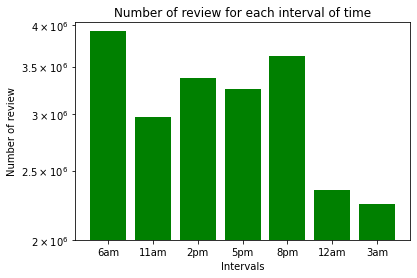

In [102]:
funzione(intervalli)

# RQ4

### What are the top 3 languages used to review applications?

il numero totale non coincide se conto review e non review_id questo perchè ci saranno dei nan

In [3]:
top_languages = pd.Series(dataset.groupby("language").review_id.count().sort_values(ascending=False).head(3))
top_languages

language
english     9635437
schinese    3764967
russian     2348900
Name: review_id, dtype: int64

In [10]:
top_languages = list(top_languages.index)
top_languages

['english', 'schinese', 'russian']

### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [13]:
def filtro(data, lingue):
    a = pd.DataFrame(columns = dataset.columns)
    for i in range(len(lingue)):
        a = pd.concat([a, data[data.language == lingue[i]]])
    return a

In [14]:
dataset_filter = filtro(dataset, top_languages)

In [15]:
dataset_filter

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
18,18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
20,20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747303,21747308,546560,Half-Life: Alyx,65646232,russian,Играю на Oculus Quest без проводов с помощью v...,1584987806,1585146937,True,161,...,True,False,False,76561198049248207,645,56,886.0,0.0,65.0,1.610130e+09
21747306,21747311,546560,Half-Life: Alyx,65646184,russian,Игра десятилетия,1584987754,1584987754,True,0,...,True,False,False,76561198307009705,57,1,1450.0,0.0,48.0,1.596121e+09
21747325,21747330,546560,Half-Life: Alyx,65646020,russian,"Красивая графика, интересный сюжет, разный вар...",1584987605,1584987605,True,0,...,True,False,False,76561197993320811,443,9,585.0,0.0,66.0,1.588512e+09
21747330,21747335,546560,Half-Life: Alyx,65645878,russian,"Это настоящая халва, кто еще не купил шлем ВР ...",1584987450,1585163194,True,0,...,True,False,False,76561197994263612,81,4,1951.0,0.0,171.0,1.599850e+09


### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

trovo le percentuali di recensioni trovate divertenti per ogni lingua tipo fra quelle scritte in inglese ce ne sono l' 11.27 %. poi scrivi bene risultato

In [16]:
numeratore = []
denominatore = []
rapporto = []
for i in range(len(top_languages)):
    numeratore.append(dataset_filter[(dataset_filter.votes_funny != 0) & (dataset_filter.language == top_languages[i])].votes_funny.count())
    denominatore.append(dataset_filter[dataset_filter.language == top_languages[i]].votes_funny.count())
    rapporto.append(round((numeratore[i]/denominatore[i])*100, 2))

rapporto

[11.27, 11.82, 16.68]

mi dà la percentuale di quanti reviews sono state trovate divertenti fra tutte e tre le lingue

In [18]:
num = dataset_filter[dataset_filter.votes_funny != 0].votes_funny.count()
den = dataset_filter.votes_funny.count()
round((num/den)*100, 2)

12.21

In [20]:
#num = i vari elementi di numeratori

1922726

In [21]:
numeratore


[1085997, 444945, 391784]

In [22]:
den

15749304

### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [23]:
numeratore = []
denominatore = []
rapporto = []
for i in range(len(top_languages)):
    numeratore.append(dataset_filter[(dataset_filter.votes_helpful != 0) & (dataset_filter.language == top_languages[i])].votes_helpful.count())
    denominatore.append(dataset_filter[dataset_filter.language == top_languages[i]].votes_helpful.count())
    rapporto.append(round((numeratore[i]/denominatore[i])*100, 2))

rapporto

[29.2, 25.1, 35.5]

In [24]:
num = dataset_filter[dataset_filter.votes_helpful != 0].votes_helpful.count()
den = dataset_filter.votes_helpful.count()
round((num/den)*100, 2)

29.16

In [25]:
numeratore

[2813873, 945157, 833896]

In [26]:
num

4592926

# RQ6 da capi se è giusto


In [5]:
dataset['Difference_Days'] = (dataset['timestamp_updated'] - dataset['timestamp_created'])

in sta colonna c'è la differenza in minuti

In [6]:
dataset['Difference_Days'] = dataset['Difference_Days']/np.timedelta64(1,'D')



elimino chi non ha aggiornato la propria review, non lo ritengo utile considerare chi se ne è sbattuto di aggiornare. poi per convertire la parte decimale dei giorni in minuti devo moltiplicare il decimale per 1440 perchè in un giorno ci sono 1440 minuti

In [64]:
dataset_1 = dataset[dataset.Difference_Days != 0]
average = dataset_1.Difference_Days.mean()
minutes = round((average % 1) * 1440, 0)
days = average // 1

In [65]:
minutes

46.0

In [66]:
days

321.0

In [103]:
a = pd.Series(dataset_1.groupby('author.steamid').review_id.count().sort_values(ascending=False).head(3))

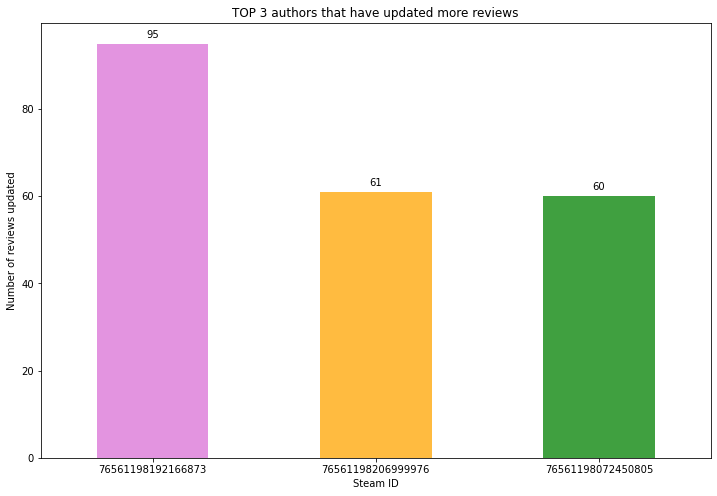

In [132]:
plt.figure(figsize=(12, 8))
ax = a.plot(kind="bar", color = ["orchid", "orange", "green"], alpha=0.75, rot=0)
ax.set_title("TOP 3 authors that have updated more reviews")
ax.set_xlabel("Steam ID")
ax.set_ylabel("Number of reviews updated")
labels = list(a.values)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom"
    )

# RQ7


### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5

In [18]:
casi_fav = dataset[dataset.weighted_vote_score >= 0.5].weighted_vote_score.count()

In [19]:
casi_fav

4784092

In [10]:
casi_tot = dataset.weighted_vote_score.count()

In [11]:
casi_fav/casi_tot

0.21998484322541792

What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [31]:
dataset_prob = dataset[dataset.weighted_vote_score > 0.5]

In [36]:
casi_fav_2 = dataset_prob[dataset_prob.votes_funny != 0].votes_funny.count()

In [37]:
casi_fav_2

1159977

In [33]:
casi_fav_2/casi_fav

0.24246544589861566

per essere indipendenti la probabilità di 'a review has at least one vote as funny' deve essere uguale a 'probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5' perchè in questo modo il condizionamento della probabilità è inutile dato che sono indipendenti

In [38]:
casi_fav_3 = dataset[dataset.votes_funny != 0].votes_funny.count()


In [39]:
casi_fav_3/casi_tot

0.1196959393390585

0.11969 è diverso da 0.2424 quindi sono dipendenti